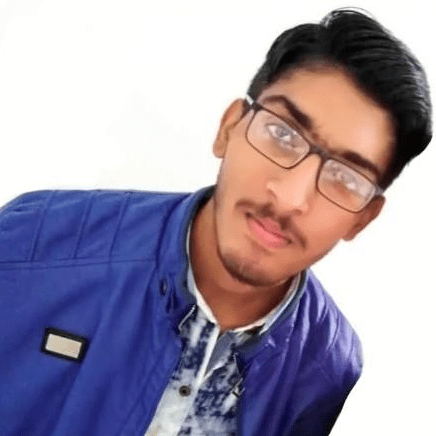

**Created By Muhammad Hanan Asghar**

**First Part is Fetching Dataset From Kaggle**

In [7]:
# Importing Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [11]:
import os
os.mkdir("/content/gdrive/My Drive/Kaggle")
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [12]:
# Change your present working directory

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [13]:
# API of dataset
!kaggle datasets download -d dileep070/anomaly-detection

 87% 38.0M/43.5M [00:00<00:00, 55.8MB/s]
100% 43.5M/43.5M [00:00<00:00, 80.5MB/s]


In [14]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  anomaly-detection.zip
  inflating: creditcard.csv          


**Reading Dataset**

In [34]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Display Dataset**

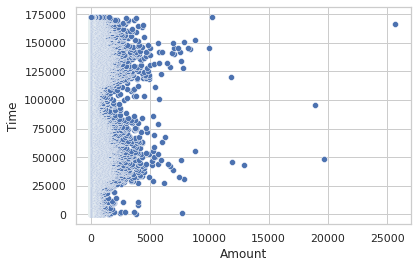

In [35]:
import seaborn as sns
sns.set(style='whitegrid')

ax = sns.scatterplot(x = 'Amount', y = 'Time', data=df)

**Preprocessing Dataset**

In [36]:
# I remove the Time table just for experimenting
df.drop('Time', inplace=True, axis=1)
Y = df.iloc[:, -1].values
X = df.iloc[:, :-1].values

In [37]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
X

array([[-1.35980713e+00, -7.27811730e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530530e-02,  1.49620000e+02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309900e-03,  1.47241690e-02,  2.69000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518410e-02,  3.78660000e+02],
       ...,
       [-7.32788671e-01, -5.50804900e-02,  2.03502975e+00, ...,
         6.84724700e-02, -5.35273890e-02,  2.47900000e+01],
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477200e-03, -2.65608290e-02,  6.78800000e+01],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01]])

**Spliting Dataset**

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.15, random_state = 0)

**Scailing Dataset for Increasing Efficiency**

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)

In [41]:
X_train

array([[ 1.46366662e+00, -1.09413489e+00, -5.01219784e-01, ...,
         1.79179580e-02,  1.03191700e-03,  2.50000000e+02],
       [ 2.07195699e+00, -1.81624075e-01, -1.18454116e+00, ...,
        -5.98046750e-02, -6.39741490e-02,  6.50000000e+00],
       [ 1.76453271e+00,  8.35932700e-03, -3.64229248e-01, ...,
        -1.99079230e-02, -5.68192790e-02,  5.45700000e+01],
       ...,
       [ 1.51260229e+00, -9.49435315e-01, -2.19061626e-01, ...,
        -1.41537100e-03,  3.66494400e-03,  3.49000000e+01],
       [ 1.79886333e+00, -1.69979073e+00, -1.42182189e-01, ...,
        -3.36155800e-02, -3.24705130e-02,  1.71310000e+02],
       [-5.89399721e-01,  7.47828393e-01,  1.78478144e+00, ...,
         8.65917860e-02,  1.18083774e-01,  1.59900000e+01]])

In [42]:
x_train

array([[ 0.74721508, -0.66100551, -0.33026516, ...,  0.04631244,
         0.00277159,  0.65165423],
       [ 1.05811628, -0.10948357, -0.78144922, ..., -0.14714198,
        -0.1956019 , -0.3314865 ],
       [ 0.90098971,  0.00534249, -0.23981292, ..., -0.04783753,
        -0.17376799, -0.137402  ],
       ...,
       [ 0.77222642, -0.57354902, -0.14396152, ..., -0.00180891,
         0.01080658, -0.21682039],
       [ 0.91853632, -1.02706417, -0.09319949, ..., -0.08195639,
        -0.09946493,  0.33394029],
       [-0.30212065,  0.45227792,  1.17913779, ...,  0.21724407,
         0.35996882, -0.29317025]])

**Artifical Neural Network ANN**

In [43]:
import keras
from keras import Sequential
from keras.layers import Dense

**Designing Network**

In [50]:
columns = int(len(df.columns[:-1]))

classifier = Sequential()


# Input and First hidden layer
classifier.add(
    Dense(
        round(int(len(df.columns)) / 2),
        kernel_initializer='random_uniform',
        activation='relu',
        input_dim=columns
    )
)

# Second Hidden layer
classifier.add(
    Dense(
        round(int(len(df.columns)) / 2),
        kernel_initializer='random_uniform',
        activation='relu',
    )
)

# Third Hidden Layer
classifier.add(
    Dense(
        round(int(len(df.columns)) / 2),
        kernel_initializer='random_uniform',
        activation='relu',
    )
)

# Output Layer
classifier.add(
    Dense(
        1,
        kernel_initializer='random_uniform',
        activation='sigmoid',
    )
)

**Compiling Network**

In [53]:
classifier.compile(optimizer="Adam", loss="binary_crossentropy", metrics=['accuracy'])

**Train ANN**

In [55]:
classifier.fit(x_train, y_train, batch_size = 110, epochs = 50)

Epoch 1/50
2201/2201 [==============================] - 3s 1ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 2/50
2201/2201 [==============================] - 3s 1ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 3/50
2201/2201 [==============================] - 3s 1ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 4/50
2201/2201 [==============================] - 3s 1ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 5/50
2201/2201 [==============================] - 3s 1ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 6/50
2201/2201 [==============================] - 3s 1ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 7/50
2201/2201 [==============================] - 3s 1ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 8/50
2201/2201 [==============================] - 3s 1ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 9/50
2201/2201 [==============================] - 3s 1ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 10/50
2201/2201 [==============================] - 3s 1ms/step - loss: 0.002

**Let's Make Prediction**

In [58]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

**Let's Checks Quality of our ANN**

In [60]:
# Making Confusion Matix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

**Let's Check Accuracy Score of Our Dataset**

In [62]:
# Getting Accuracy Score of our ANN
from sklearn.metrics import accuracy_score

print("The Final Accuracy Score of Our ANN is : ",accuracy_score(y_test,y_pred))

The Final Accuracy Score of Our ANN is :  0.999274361555207


**Let's Display Confusion Matrix**

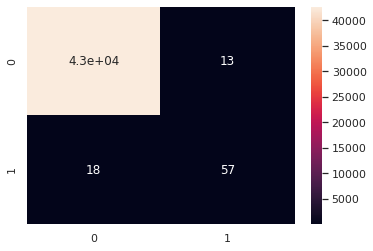

In [64]:
# Making heatmap
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True)
plt.savefig("final.png")